In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.6/597.6 kB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 41.3 MB/s eta 0:00:00


In [ ]:
!pip install infercnvpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import gzip
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import gseapy as gp
import infercnvpy as cnv

In [ ]:
adata_file = '/content/drive/MyDrive/ALSF/SCPCP000023/SCPCP000023_scvi_processed_rna.h5ad'
adata = adata = sc.read_h5ad(adata_file)

In [ ]:
adata

AnnData object with n_obs × n_vars = 195167 × 60319
    obs: 'barcodes', 'sum', 'detected', 'total', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'miQC_pass', 'prob_compromised', 'scpca_filter', 'additional_modalities', 'singler_celltype_annotation', 'singler_celltype_ontology', 'cellassign_celltype_annotation', 'cellassign_celltype_ontology', 'cellassign_max_prediction', 'consensus_celltype_annotation', 'consensus_celltype_ontology', 'library_id', 'cell_id', 'sample_id', 'scpca_project_id', 'submitter_id', 'participant_id', 'submitter', 'age', 'age_timing', 'sex', 'diagnosis', 'subdiagnosis', 'tissue_location', 'disease_timing', 'organism', 'is_xenograft', 'is_cell_line', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'tech_version', 'assay_ontology_term_id', 'suspension_type', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids

In [ ]:
adata_subset_file = '/content/drive/MyDrive/ALSF/SCPCP000023/SCPCP000023_cnv_subset_rna.h5ad'
adata_subset_for_cnv = sc.read_h5ad(adata_subset_file)

In [ ]:
adata_subset_for_cnv

AnnData object with n_obs × n_vars = 195167 × 30815
    obs: 'barcodes', 'sum', 'detected', 'total', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'miQC_pass', 'prob_compromised', 'scpca_filter', 'additional_modalities', 'singler_celltype_annotation', 'singler_celltype_ontology', 'cellassign_celltype_annotation', 'cellassign_celltype_ontology', 'cellassign_max_prediction', 'consensus_celltype_annotation', 'consensus_celltype_ontology', 'library_id', 'cell_id', 'sample_id', 'scpca_project_id', 'submitter_id', 'participant_id', 'submitter', 'age', 'age_timing', 'sex', 'diagnosis', 'subdiagnosis', 'tissue_location', 'disease_timing', 'organism', 'is_xenograft', 'is_cell_line', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'tech_version', 'assay_ontology_term_id', 'suspension_type', '_scvi_batch', '_scvi_labels', 'cnv_ref_group'
 

In [ ]:
cnv_key_obsm =  'X_cnv'
cnv_key_uns = 'cnv'
cnv_output_matrix = adata_subset_for_cnv.obsm[cnv_key_obsm]
n_output_features = cnv_output_matrix.shape[1]

# Convert to dense if sparse
if hasattr(cnv_output_matrix, 'toarray'):
    cnv_output_dense = cnv_output_matrix.toarray()
else:
   cnv_output_dense = cnv_output_matrix



In [ ]:
window_names = [f'cnv_window_{i+1}' for i in range(n_output_features)]
cnv_window_matrix_df = pd.DataFrame(cnv_output_dense,
                                    index=adata_subset_for_cnv.obs_names,
                                    columns=window_names)

In [ ]:
adata.obsm['X_cnv_windows'] = pd.DataFrame(0.0,
                                           index=adata.obs_names,
                                           columns=window_names)

adata.obsm['X_cnv_windows'].update(cnv_window_matrix_df)
adata.obsm['X_cnv_windows'] = adata.obsm['X_cnv_windows'].values
print(f"Stored CNV window values in adata.obsm['X_cnv_windows']")

adata.uns[cnv_key_uns] = adata_subset_for_cnv.uns[cnv_key_uns]

Stored CNV window values in adata.obsm['X_cnv_windows']


In [ ]:
output_adata_file = '/content/drive/MyDrive/ALSF/SCPCP000023/SCPCP000023_adata_with_cnv.h5ad'
adata.write_h5ad(output_adata_file)
print(f"Processed adata saved to: {output_adata_file}")

Processed adata saved to: /content/drive/MyDrive/ALSF/SCPCP000023/SCPCP000023_adata_with_cnv.h5ad


In [ ]:
adata_data_file = '/content/drive/MyDrive/ALSF/SCPCP000023/SCPCP000023_adata_with_cnv.h5ad'
adata = sc.read_h5ad(adata_data_file)

In [ ]:
adata

AnnData object with n_obs × n_vars = 195167 × 60319
    obs: 'barcodes', 'sum', 'detected', 'total', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'miQC_pass', 'prob_compromised', 'scpca_filter', 'additional_modalities', 'singler_celltype_annotation', 'singler_celltype_ontology', 'cellassign_celltype_annotation', 'cellassign_celltype_ontology', 'cellassign_max_prediction', 'consensus_celltype_annotation', 'consensus_celltype_ontology', 'library_id', 'cell_id', 'sample_id', 'scpca_project_id', 'submitter_id', 'participant_id', 'submitter', 'age', 'age_timing', 'sex', 'diagnosis', 'subdiagnosis', 'tissue_location', 'disease_timing', 'organism', 'is_xenograft', 'is_cell_line', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'tech_version', 'assay_ontology_term_id', 'suspension_type', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids

In [ ]:
plot_adata = adata_subset_for_cnv
cnv_storage_key = 'cnv' # Default key_added

In [ ]:
print("Step 1: Running PCA and Leiden on the full dataset...")
sc.tl.pca(plot_adata, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(plot_adata, n_pcs=50, key_added='cnv_neighbors')
sc.tl.leiden(plot_adata, resolution=0.4, neighbors_key='cnv_neighbors', key_added='cnv_leiden_custom', flavor="igraph", n_iterations=2)
print("Clustering on full dataset complete.")

Step 1: Running PCA and Leiden on the full dataset...
Clustering on full dataset complete.


In [ ]:
print("\nStep 2: Subsampling data for visualization...")
# Let's take 15,000 cells for a clearer plot
n_subsample = min(15000, plot_adata.n_obs)

# sc.pp.subsample with copy=True returns the subsampled AnnData object
plot_adata = sc.pp.subsample(plot_adata, n_obs=n_subsample, copy=True)

print(f"Created a plotting object with {plot_adata.n_obs} cells.")


Step 2: Subsampling data for visualization...
Created a plotting object with 15000 cells.



Step 3: Generating chromosome heatmap on subsampled data...


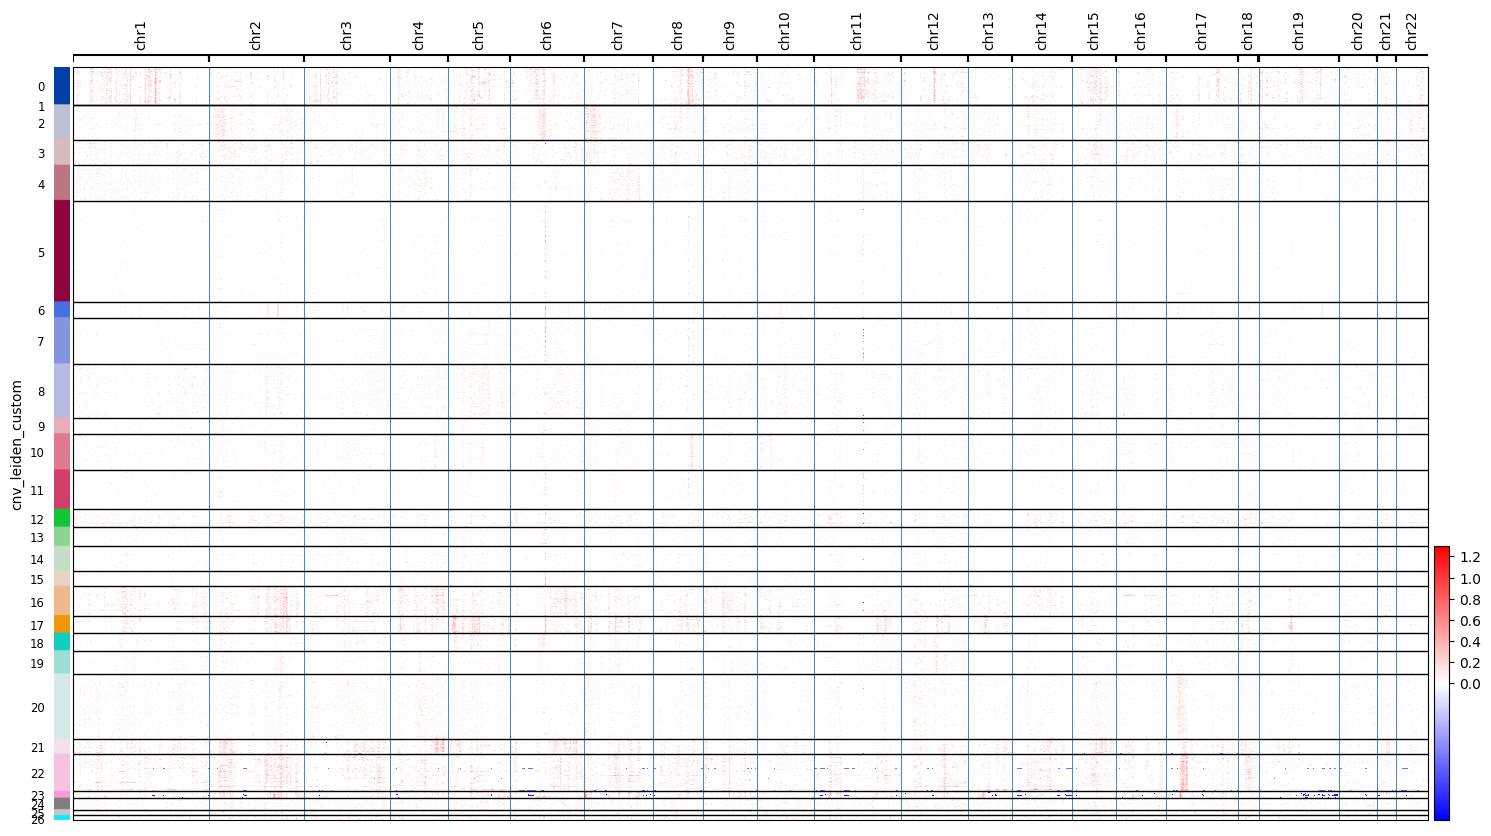

In [ ]:
print("\nStep 3: Generating chromosome heatmap on subsampled data...")
cnv.pl.chromosome_heatmap(
    plot_adata,
    groupby='cnv_leiden_custom', # Use the clusters calculated on the full data
    use_rep=cnv_storage_key,
    figsize=(18, 10)
)

# Validate and Refine Tumor/Normal Assignments

In [ ]:
cnv_matrix_key = 'X_cnv_windows'
from sklearn.cluster import KMeans
import numpy as np

cnv_data_for_scoring = adata.obsm[cnv_matrix_key]
adata.obs['cnv_activity_score'] = np.sum(np.square(cnv_data_for_scoring), axis=1)
print("Calculated 'cnv_activity_score' for all cells.")

Calculated 'cnv_activity_score' for all cells.


In [ ]:
# Reshape the 1D array of scores into a 2D array for scikit-learn
cnv_scores_reshaped = adata.obs[['cnv_activity_score']].values

# Initialize and fit KMeans with 2 clusters (Normal, Tumor)
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(cnv_scores_reshaped)

# Add the cluster labels to adata.obs
adata.obs['cnv_kmeans_cluster'] = kmeans.labels_.astype(str)
print("Performed KMeans clustering (k=2) on the CNV activity scores.")

Performed KMeans clustering (k=2) on the CNV activity scores.


In [ ]:
# --- Step 3: Identify which cluster is 'Tumor' and which is 'Normal' ---
# The cluster with the higher average CNV score is the 'Tumor' cluster.
cluster0_mean_score = adata.obs[adata.obs['cnv_kmeans_cluster'] == '0']['cnv_activity_score'].mean()
cluster1_mean_score = adata.obs[adata.obs['cnv_kmeans_cluster'] == '1']['cnv_activity_score'].mean()

print(f"Mean CNV score for cluster 0: {cluster0_mean_score:.4f}")
print(f"Mean CNV score for cluster 1: {cluster1_mean_score:.4f}")

Mean CNV score for cluster 0: 2.2980
Mean CNV score for cluster 1: 17.2108


In [ ]:
if cluster0_mean_score > cluster1_mean_score:
    tumor_cluster_label = '0'
    normal_cluster_label = '1'
else:
    tumor_cluster_label = '1'
    normal_cluster_label = '0'

print(f"Identified Cluster '{tumor_cluster_label}' as Tumor and Cluster '{normal_cluster_label}' as Normal.")

Identified Cluster '1' as Tumor and Cluster '0' as Normal.


In [ ]:
# --- Step 4: Assign the final 'cnv_status' label ---
adata.obs['cnv_status'] = adata.obs['cnv_kmeans_cluster'].replace({
    tumor_cluster_label: 'Tumor',
    normal_cluster_label: 'Normal'
}).astype('category')

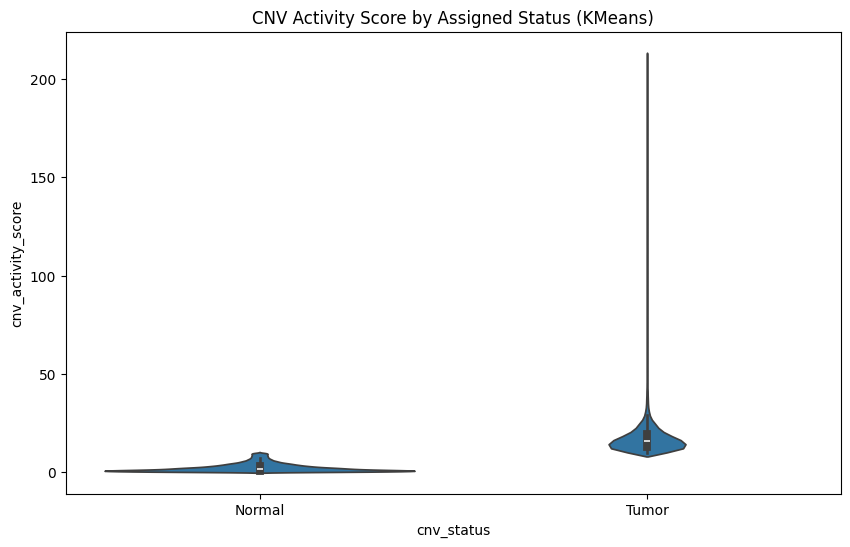

In [ ]:
# --- Step 5: Visualize and verify the assignment ---
plt.figure(figsize=(10, 6))
sns.violinplot(data=adata.obs, x='cnv_status', y='cnv_activity_score', order=['Normal', 'Tumor'])
plt.title('CNV Activity Score by Assigned Status (KMeans)')
plt.show()

In [ ]:
print("\nFinal distribution of 'cnv_status':")
print(adata.obs['cnv_status'].value_counts())

# --- Clean up intermediate columns ---
adata.obs.drop(columns=['cnv_kmeans_cluster'], inplace=True)


Final distribution of 'cnv_status':
cnv_status
Normal    158739
Tumor      36428
Name: count, dtype: int64


In [ ]:
adata

AnnData object with n_obs × n_vars = 195167 × 60319
    obs: 'barcodes', 'sum', 'detected', 'total', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'miQC_pass', 'prob_compromised', 'scpca_filter', 'additional_modalities', 'singler_celltype_annotation', 'singler_celltype_ontology', 'cellassign_celltype_annotation', 'cellassign_celltype_ontology', 'cellassign_max_prediction', 'consensus_celltype_annotation', 'consensus_celltype_ontology', 'library_id', 'cell_id', 'sample_id', 'scpca_project_id', 'submitter_id', 'participant_id', 'submitter', 'age', 'age_timing', 'sex', 'diagnosis', 'subdiagnosis', 'tissue_location', 'disease_timing', 'organism', 'is_xenograft', 'is_cell_line', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'organism_ontology_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'tech_version', 'assay_ontology_term_id', 'suspension_type', '_scvi_batch', '_scvi_labels', 'cnv_activity_sco

In [ ]:
output_adata_file = '/content/drive/MyDrive/ALSF/SCPCP000023/SCPCP000023_adata_with_cnv_status.h5ad'
adata.write_h5ad(output_adata_file)